<a href="https://colab.research.google.com/github/WelfLowe/RLAgents/blob/main/Simple_Reinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
!pip install gym

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize the environment

CartPole-v1 is an environment where a cart must balance a pole.
* The state consists of four continuous values: cart position, cart velocity, pole angle, and pole velocity.
* The actions are 0 (move left) and 1 (move right).

In [ ]:
env = gym.make("CartPole-v1")

# Q-Learning

An agent explores with probability epsilon and exploits (chooses the best action) otherwise.
The exploration rate epsilon decreases over time to favor exploitation as the agent learns.


In [ ]:
alpha = 0.1       # Learning rate
gamma = 0.99      # Discount factor
epsilon = 1.0     # Exploration rate
epsilon_decay = 0.995
epsilon_min = 0.01
episodes = 10000    # Number of episodes


# Observation and action space

The observation state space here is discretized while the original state space is continuous.

In [ ]:
obs_space_high = env.observation_space.high
obs_space_low = env.observation_space.low
obs_space_high[1] = 0.5  # Limit cart velocity
obs_space_low[1] = -0.5
obs_space_high[3] = 50   # Limit pole velocity
obs_space_low[3] = -50
bins = [20, 20, 20, 20]  # Number of bins for discretization
obs_space = [np.linspace(low, high, b) for low, high, b in zip(obs_space_low, obs_space_high, bins)]

The Q-table is a lookup table that stores the expected reward for each state-action pair. It is initialized with zeros.

In [ ]:
q_table = np.zeros((*bins, env.action_space.n))

# Train

In [ ]:
def discretize(state):
    """Converts continuous state into a discrete index."""
    return tuple(np.digitize(state[i], obs_space[i]) - 1 for i in range(len(state)))

def choose_action(state, epsilon):
    """Chooses an action using an epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    return np.argmax(q_table[state])

# Training loop
rewards = []
for episode in range(episodes):
    state = discretize(env.reset())
    total_reward = 0
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize(next_state)

        # Adjust reward for stability
        if done and total_reward < 195:
            reward = -10  # Penalize for early failure

        # Update Q-value using a moving average
        best_next_action = np.argmax(q_table[next_state])
        q_table[state + (action,)] += alpha * (reward + gamma * q_table[next_state + (best_next_action,)] - q_table[state + (action,)])

        state = next_state
        total_reward += reward

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)

    if episode % 1000 == 0:
        print(f"Episode {episode}: Total Reward: {total_reward}")

# Close the environment
env.close()


Episode 0: Total Reward: 26.0
Episode 1000: Total Reward: 22.0
Episode 2000: Total Reward: 54.0
Episode 3000: Total Reward: 116.0
Episode 4000: Total Reward: 131.0
Episode 5000: Total Reward: 70.0
Episode 6000: Total Reward: 5.0
Episode 7000: Total Reward: 60.0
Episode 8000: Total Reward: 72.0
Episode 9000: Total Reward: 82.0


# Plot results

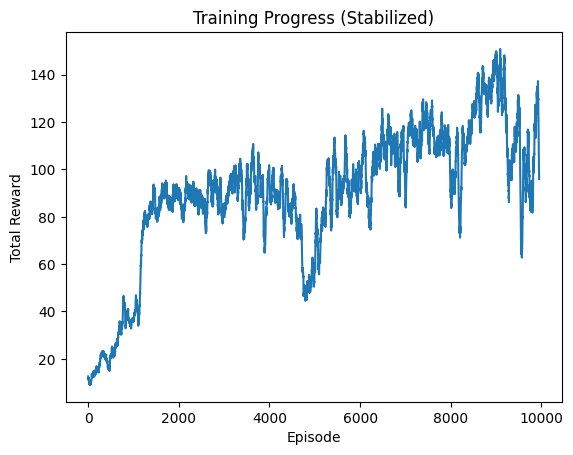

In [ ]:
# Smooth rewards for better visualization
smoothed_rewards = np.convolve(rewards, np.ones(50)/50, mode='valid')

# Plot the rewards
plt.plot(smoothed_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress (Stabilized)")
plt.show()

# Taks:
1. Understand the example
1. Improve the final reward
1. Improve the stability